<a href="https://colab.research.google.com/github/diemtca/Curso_De_Python_SoyDalto/blob/main/Clasificaci%C3%B3n_enfermedad_coronaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traducido de: https://colab.research.google.com/github/CongLiu-CN/AIisLove/blob/master/_notebooks/2020-04-30-end-to-end-heart-disease-classification.ipynb#scrollTo=qkZ9-AmaZ9y9 

## Prediciendo enfermedades del corazón usando aprendizaje automático
Este cuaderno investiga el uso de varias bibliotecas de ciencia de datos y aprendizaje automático basadas en Python, con el objetivo de construir un modelo de aprendizaje automático capaz de predecir si alguien tiene o no una enfermedad del corazón basándose en sus atributos médicos.

Vamos a seguir el siguiente enfoque:
1. Definición del problema
2. Datos
3. Evaluación
4. Características
5. Modelado
6. Experimentación

## 1. Definición del problema

En una declaración,
> Dados los parámetros clínicos de un paciente, ¿podemos predecir si tiene o no enfermedad del corazón?

## 2. Datos

Los datos originales provienen de los datos de Cleavland del Repositorio de Aprendizaje Automático de UCI. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

También hay una versión disponible en Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci
## 3. Evaluación

> Si podemos alcanzar un 95% de precisión al predecir si un paciente tiene o no enfermedad del corazón durante la prueba de concepto, continuaremos con el proyecto.

## 4. Características
Aquí es donde obtendrás información diferente sobre cada una de las características de tus datos.

**crear diccionario de datos**
1. age - edad en años
* sex - (1 = hombre; 0 = mujer)
* cp - tipo de dolor en el pecho
    - 0: Angina típica: dolor en el pecho relacionado con la disminución del suministro de sangre al corazón
    - 1: Angina atípica: dolor en el pecho no relacionado con el corazón
    - 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
    - 3: Asintomático: dolor en el pecho sin mostrar signos de enfermedad
* trestbps - presión arterial en reposo (en mm Hg al ingreso al hospital): cualquier valor por encima de 130-140 generalmente es motivo de preocupación
* chol - colesterol sérico en mg/dl
    - suero = LDL + HDL + .2 * triglicéridos
    - por encima de 200 es motivo de preocupación
* fbs - (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
    - '>126' mg/dL indica diabetes
* restecg - resultados electrocardiográficos en reposo
    - 0: Nada que destacar
    - 1: Anormalidad de la onda ST-T
        - puede variar desde síntomas leves hasta problemas graves
        - señales de latidos cardíacos anormales
    - 2: Posible o definitiva hipertrofia ventricular izquierda
        - Cámara de bombeo principal del corazón agrandada
* thalach - frecuencia cardíaca máxima alcanzada
* exang - angina inducida por el ejercicio (1 = sí; 0 = no)
* oldpeak - depresión del ST inducida por el ejercicio en relación al reposo
    - analiza el estrés del corazón durante el ejercicio; un corazón poco saludable se estresará más
* slope - la pendiente del segmento ST pico del ejercicio
    - 0: Ascendente: mejor frecuencia cardíaca con ejercicio (poco común)
    - 1: Pendiente plana: cambio mínimo (corazón sano típico)
    - 2: Descendente: signos de corazón poco saludable
* ca - número de vasos principales (0-3) coloreados por fluoroscopía
    - el vaso coloreado significa que el médico puede ver el paso de la sangre a través de él
    - cuanto más movimiento de sangre, mejor (sin coágulos)
* thal - resultado del estrés por talio
    - 1,3: normal
    - 6: defecto fijo (solía haber un defecto pero ahora está bien)
    - 7: defecto reversible (no hay movimiento adecuado de sangre al hacer ejercicio)
* target - tener enfermedad o no (1=sí, 0=no) (=el atributo predicho)

# Preparando las herramientas
Vamos a utilizar pandas, Matplotlib y NumPy para el análisis y manipulación de datos.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

ImportError: ignored

## Cargar datos

In [ ]:
df = pd.read_csv("heart.csv")
df.shape # (rows, columns)

(1025, 14)

## Exploración de datos (análisis exploratorio de datos o EDA)
El objetivo aquí es conocer más sobre los datos y convertirse en un experto en el tema del conjunto de datos con el que estás trabajando.
1. ¿Qué pregunta(s) estás tratando de resolver?
2. ¿Qué tipo de datos tenemos y cómo tratamos los diferentes tipos?
3. ¿Qué falta en los datos y cómo lo solucionas?
4. ¿Dónde están los valores atípicos y por qué deberías preocuparte por ellos?
5. ¿Cómo puedes agregar, cambiar o eliminar características para obtener más información de tus datos?

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

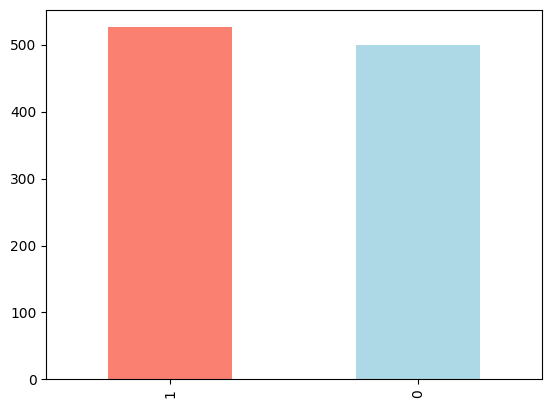

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Frecuencia según sexo

In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


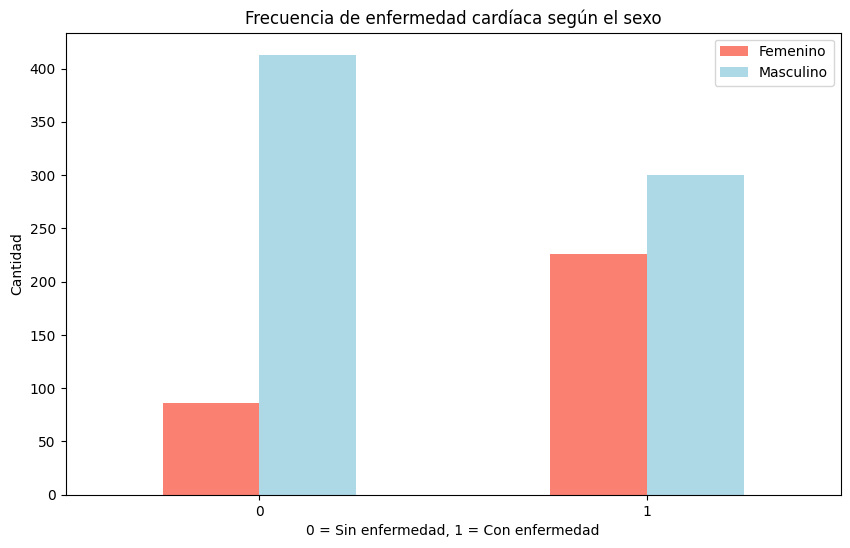

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Frecuencia de enfermedad cardíaca según el sexo")
plt.xlabel("0 = Sin enfermedad, 1 = Con enfermedad")
plt.ylabel("Cantidad")
plt.legend(["Femenino", "Masculino"]);
plt.xticks(rotation=0);

## Edad vs. Frecuencia cardiaca máxima para enfermedad cardiaca
---



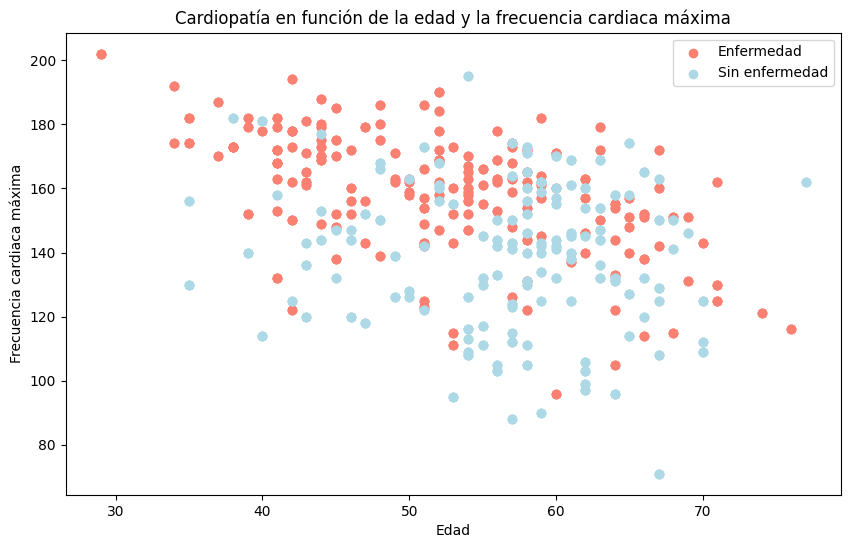

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Cardiopatía en función de la edad y la frecuencia cardiaca máxima")
plt.xlabel("Edad")
plt.ylabel("Frecuencia cardiaca máxima")
plt.legend(["Enfermedad", "Sin enfermedad"]);

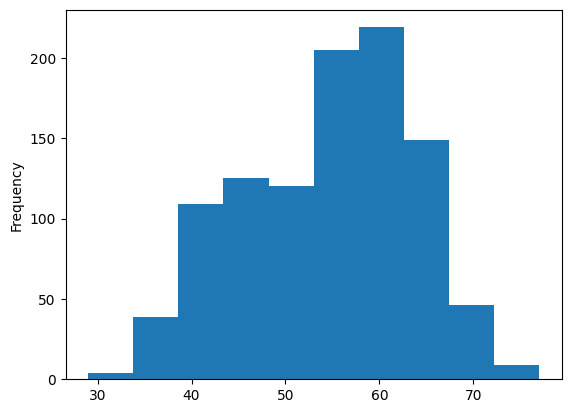

In [ ]:
# Comprueba la distribución de la columna de edad con un histograma
df.age.plot.hist();

## Frecuencia de cardiopatías por tipo de dolor torácico
1. cp - tipo de dolor torácico
    - 0: Angina típica: dolor torácico relacionado con la disminución del riego sanguíneo al corazón
    - 1: Angina atípica: dolor torácico no relacionado con el corazón
    - 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
    - 3: Asintomático: dolor torácico que no muestra signos ni enfermedad

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


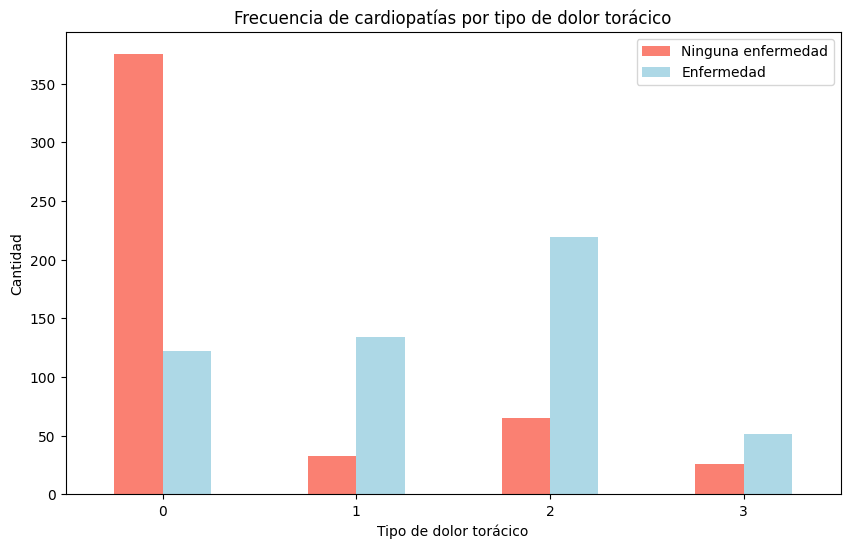

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Frecuencia de cardiopatías por tipo de dolor torácico")
plt.xlabel("Tipo de dolor torácico")
plt.ylabel("Cantidad")
plt.legend(["Ninguna enfermedad", "Enfermedad"])
plt.xticks(rotation=0);


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.0, 0.0)

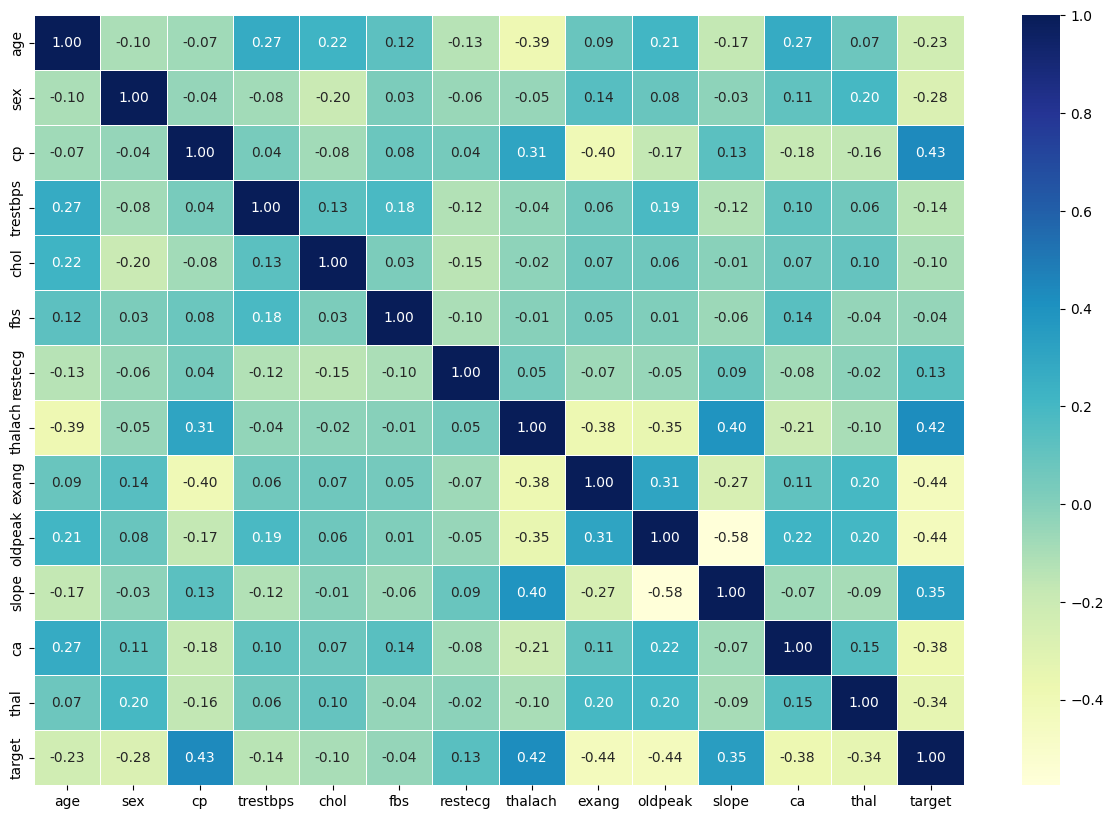

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

## 5. Modelización

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.drop("target", axis=1)

y = df["target"]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [ ]:
y_train, len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

Ahora que tenemos los datos divididos en conjuntos de entrenamiento y de prueba, es hora de construir un modelo de aprendizaje automático.

Lo entrenaremos (encontraremos los patrones) en el conjunto de entrenamiento.

Y lo probaremos (utilizaremos los patrones) en el conjunto de prueba.

Vamos a probar 3 modelos diferentes de aprendizaje automático:
1. 1. Regresión logística
2. Clasificador K-Nearest Neighbors
3. Clasificador Random Forest

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

## Comparación de modelos

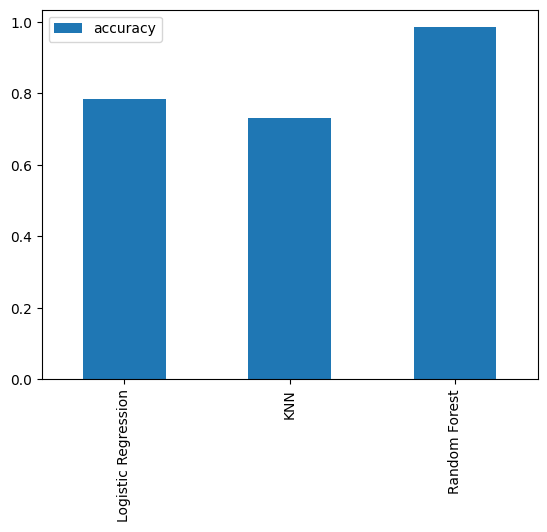

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Ahora tenemos un modelo de referencia... y sabemos que las primeras predicciones de un modelo no siempre son en las que debemos basar nuestros próximos pasos. ¿Qué debemos hacer?

Veamos lo siguiente:
* Ajuste de hiperparámetros
* Importancia de las características
* Matriz de confusión
* Validación cruzada
* Precisión
* Recall
* Puntuación F1
* Informe de clasificación
* Curva ROC
* Área bajo la curva (AUC)

### Ajuste de hiperparámetros (a mano)


In [ ]:

train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [ ]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

Máxima puntuación KNN en los datos de prueba: 98.54%


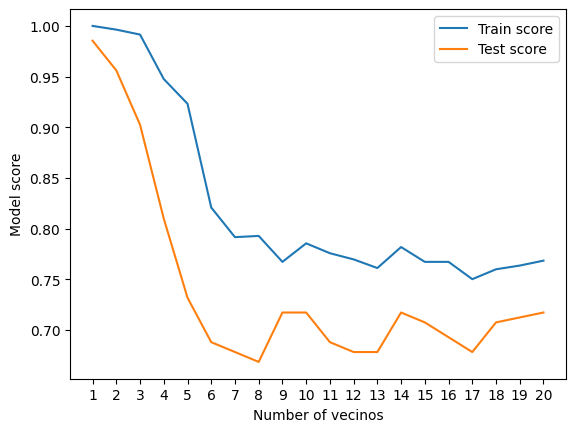

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of vecinos")
plt.ylabel("Model score")
plt.legend()

print(f"Máxima puntuación KNN en los datos de prueba: {max(test_scores)*100:.2f}%")

### Ajuste de hiperparámetros con RandomizedSearchCV
Vamos a afinar:
* LogisticRegression()
* RandomForestClassifier()

...usando RandomizedSearchCV

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Ahora que tenemos configuradas las rejillas de hiperparámetros para cada uno de nuestros modelos, vamos a sintonizarlos utilizando RandomizedSearchCV...

In [ ]:

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

Ahora hemos ajustado LogisticRegression(). Hagamos lo mismo con RandomForestClassifer()...

In [ ]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
rs_rf.score(X_test, y_test)

0.926829268292683

## Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.7853658536585366

## Evaluar nuestro clasificador de aprendizaje automático ajustado, más allá de la precisión
* Curva ROC y puntuación AUC
* Matriz de confusión
* Informe de clasificación
* Precisión
* Recall
* Puntuación F1

...y sería estupendo que se utilizara la validación cruzada siempre que fuera posible.

Para hacer comparaciones y evaluar nuestro modelo entrenado, primero tenemos que hacer predicciones.

In [ ]:
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [ ]:
plot_roc_curve(gs_log_reg, X_test, y_test)

NameError: ignored

In [ ]:
print(confusion_matrix(y_test, y_preds))

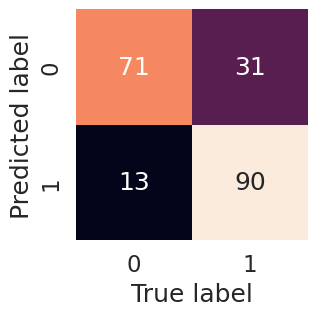

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim()
    
plot_conf_mat(y_test, y_preds)

Ahora tenemos una curva ROC, una métrica AUC y una matriz de confusión, 

vamos a obtener un informe de clasificación, así como una validación cruzada de precisión, recuperación y f1-score.

In [ ]:
print(classification_report(y_test, y_preds))

## Calcular las métricas de evaluación mediante validación cruzada
Vamos a calcular la exactitud, precisión, recall y f1-score de nuestro modelo utilizando validación cruzada,

para ello utilizaremos `cross_val_score()`

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X, 
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Importancia de las características
La importancia de las características es otra pregunta: "¿qué características contribuyeron más a los resultados del modelo y cómo contribuyeron?".

Encontrar la importancia de las características es diferente para cada modelo de aprendizaje automático. Una forma de encontrar la importancia de las características es buscar "(NOMBRE DEL MODELO) importancia de las características".

Busquemos la importancia de las características de nuestro modelo LogisticRegression...

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [ ]:
# Check coef_
clf.coef_

In [ ]:
df.head()

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Importancia de la característica", legend=False);

In [ ]:
pd.crosstab(df["sex"], df["target"])

In [ ]:
pd.crosstab(df["slope"], df["target"])

pendiente: la pendiente del segmento ST de ejercicio máximo.
* 0: Pendiente ascendente: mejor frecuencia con el ejercicio (poco frecuente)
* 1: Pendiente plana: cambio mínimo (corazón sano típico)
* 2: Downslopins: signos de corazón poco sano


## 6. Experimentación
Si aún no ha dado con su métrica de evaluación... pregúntese...
* ¿Podría recopilar más datos?
* ¿Podría probar un modelo mejor? ¿Como CatBoost o XGBoost?
* ¿Podría mejorar los modelos actuales? (más allá de lo que hemos hecho hasta ahora)
* Si tu modelo es lo suficientemente bueno (has alcanzado tu métrica de evaluación), ¿cómo lo exportarías y compartirías con otros?